## Introduction To Regression 

In [1]:
import numpy as np
import pandas as pd

import sys
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# set the parameters that control the axes and label size in the plots
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# folders to save the output of the code
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chapter_4"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID, "images")

In [5]:
# function to save the plots in the specified path
# set the tight layout to true so that subplots are plotted with aporpriate padding

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=360):
    
    # return a string of the path where the image needs to be saved
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    
    # create a directory if the specified does not exist
    if not os.path.isdir(IMAGE_PATH):
        os.makedirs(IMAGE_PATH)
    
    # inform the user about saving the image
    print("saving image...", fig_id)
    
    # plot the figure with tight layout
    if tight_layout:
        plt.tight_layout()
        
    # save the image
    plt.savefig(path, format=fig_extension, dpi=360)

In [6]:
# ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear Regression Using Normal Equation

In [7]:
# generate some random 2D data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

saving image... generated_plot


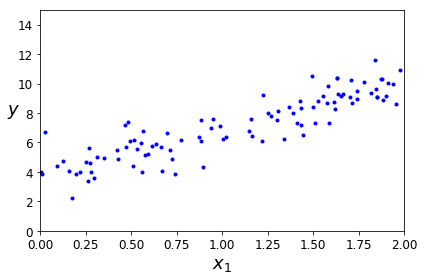

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_plot")

In [7]:
# get the shape of X and y
print("shape of X : ", X.shape)
print("shape of y : ", y.shape)

shape of X :  (100, 1)
shape of y :  (100, 1)


In [8]:
# add column of 1's to X ie. add x0 = 1 to each instance
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[ 3.70193894],
       [ 3.18426175]])

In [10]:
# create a new X
X_new = np.array([[0], [2]])
# add ones
X_new_b = np.c_[np.ones((2,1)), X_new]
# predict y using learned theta
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  3.70193894],
       [ 10.07046244]])

[0, 2, 0, 15]

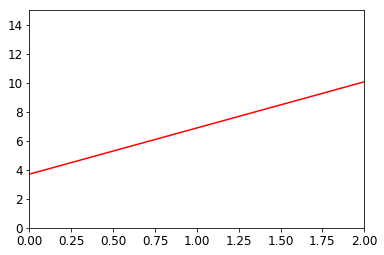

In [11]:
# plot the new X and predicted y
plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15])

saving image... lin_reg_normal-eq


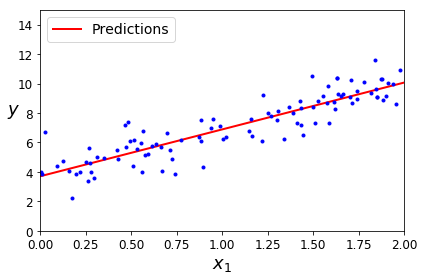

In [12]:
# plot the new X and predicted y
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")

# plot the old X and y over the new plot
plt.plot(X, y, "b.")

# set the plot options
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

# save the plot
save_fig("lin_reg_normal-eq")

In [13]:
# linear regression using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
lin_reg.intercept_, lin_reg.coef_

(array([ 3.70193894]), array([[ 3.18426175]]))

In [15]:
# predict for X_new using lin_reg
lin_reg.predict(X_new)

array([[  3.70193894],
       [ 10.07046244]])

## Linear Regression Using Batch Gradient Descent

In [16]:
alpha = 0.1 # learning rate
n_iter = 1000 # iterations for gradient descent
m = 100 # number of instances in X
theta = np.random.randn(2, 1) # random initialization of theta vector

# gradient descent iterations
for iteration in range(n_iter):
    gradient = (2/m) * (X_b.T.dot(X_b.dot(theta) - y))
    theta = theta - alpha * gradient

In [17]:
theta

array([[ 3.70193894],
       [ 3.18426175]])

In [18]:
# make predictions using theta learned from gradient descent
X_new_b.dot(theta)

array([[  3.70193894],
       [ 10.07046244]])

In [19]:
# function to plot batch gradient descent

# list to save the theta vector of each iteration as an individual row
theta_path_bgd = []

def batch_gradient_descent(theta, alpha, n_iter, theta_path=None):
    
    m = len(X_b) # number of training instances
    
    # plot the data points
    plt.plot(X, y, "b.")
    
    # iterate 1000 times ie. run gradient descent for a total of 1000 times
    for iteration in range(n_iter):
        
        # plot for the first 10 iterations, these will not fit the dataset
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            
            # use a different style of plot for the first iteration of gradient descent that will be fit to data
            style = "r-" if iteration > 0 else "g--"
            plt.plot(X_new, y_predict, style, linewidth=1)
        
        # calculate the gradient vector and update theta
        gradient = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - alpha * gradient
        
        # save the theta of each iteration
        if theta_path is not None:
            theta_path.append(theta)
            
    # set the plot options
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(f"learn_rate = {alpha}\niterations = {n_iter}", fontsize=14)

saving image... bgd_various


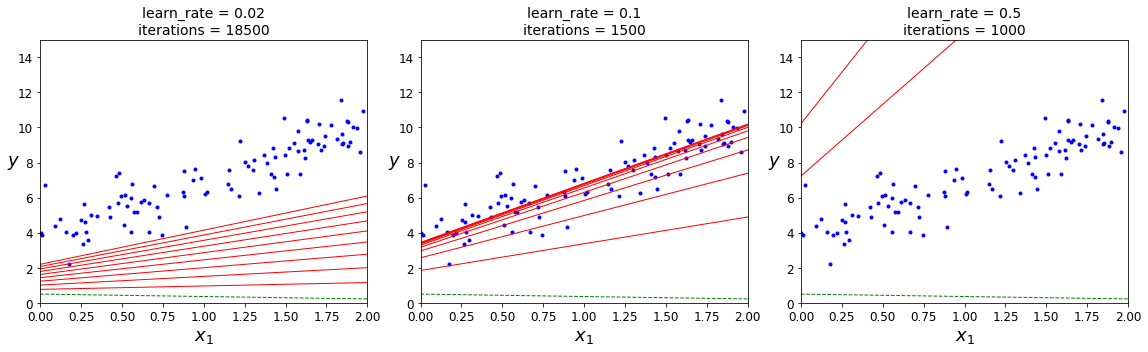

In [20]:
np.random.seed(42) # set the random seed
theta = np.random.randn(2,1) # random initialization

# prepare the subplot
plt.figure(figsize=(16, 5))

# first subplot for learning rate 0.02
plt.subplot(131); batch_gradient_descent(theta, alpha=0.02, n_iter=18500)
plt.ylabel("$y$", rotation=0, fontsize=18)

# second subplot for learning rate 0.1
plt.subplot(132); batch_gradient_descent(theta, alpha=0.1, n_iter=1500, theta_path=theta_path_bgd)
plt.ylabel("$y$", rotation=0, fontsize=18)

# third subplot for learning rate 0.5
plt.subplot(133); batch_gradient_descent(theta, alpha=0.5, n_iter=1000)
plt.ylabel("$y$", rotation=0, fontsize=18)

# save the plot
save_fig("bgd_various")

## Stochastic Gradient Descent

In [21]:
# list to save the theta vector of each epoch of SGD as a row instance
theta_path_sgd = []
np.random.seed(42) # to keep the output consistent

In [22]:
t0, t1 = 5, 50 # hyperparameters for learning schedule

# implementation of learning schedule that controls the learning rate over the epochs
def learning_schedule(t):
    return t0 / (t + t1)

# function to plot stochastic gradient descent over various epochs
def stochastic_gradient_descent(theta, n_epochs, theta_path=None):
    
    m = len(X_b) # number of training instances
    
    # plot the data points
    plt.plot(X, y, "b.")
    
    # iterate over the specified number of epochs
    for epoch in range(n_epochs):
        for i in range(m):
            
            # generate a different plot for the first epoch
            if epoch == 0 and i < 20:
                y_predict = X_new_b.dot(theta)
                style = "r-" if i > 0 else "g--" # dashed output for epoch 0 and instance 0
                plt.plot(X_new, y_predict, style, linewidth=1) # these will not fit the dataset
            
            # generate a random instance for SGD
            random_index = np.random.randint(m)
            
            # get a random X and corresponding y instance using random index
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # calculate the gradient vector
            # no need to divide gradient vector by m as we are not going over the entire dataset
            # ie. averaging over the dataset not required
            gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
            
            # get the learning rate from the learning schedule
            alpha = learning_schedule(epoch * m + i)
            
            # update the theta vector
            theta = theta - alpha * gradient
            
            # save the theta of each iteration as a row
            if theta_path is not None:
                theta_path.append(theta)
                
    # set the plot options
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(f"epoch = {n_epochs}", fontsize=14)

saving image... sgd_various


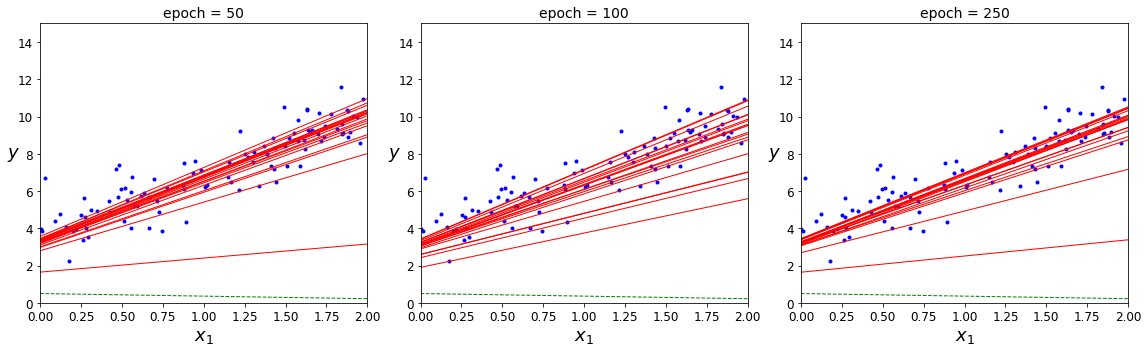

In [23]:
np.random.seed(42) # set the random seed
theta = np.random.randn(2, 1) # random initialization of theta vector

# prepare the subplot
plt.figure(figsize=(16, 5))

# first subplot of SGD with epochs=50
plt.subplot(131); stochastic_gradient_descent(theta, n_epochs=50, theta_path=theta_path_sgd)
plt.ylabel("$y$", rotation=0, fontsize=18)

# second subplot of SGD with epochs=100
plt.subplot(132); stochastic_gradient_descent(theta, n_epochs=100)
plt.ylabel("$y$", rotation=0, fontsize=18)

# third plot of sgd with epochs=250
plt.subplot(133); stochastic_gradient_descent(theta, n_epochs=250)
plt.ylabel("$y$", rotation=0, fontsize=18)

# save the plot
save_fig("sgd_various")

In [24]:
# SGD using sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [25]:
# compare the results with implementation
print("USING LIBRARY")
print("=" * 50)
print(f"theta0 = {sgd_reg.intercept_}, theta1 = {sgd_reg.coef_}")
print()
print("USING IMPLEMENTATION")
print("=" * 50)
print(f"theta0 = {theta_path_sgd[-1][0]}, theta1 = {theta_path_sgd[-1][1]}")

USING LIBRARY
theta0 = [ 3.74090033], theta1 = [ 3.24605954]

USING IMPLEMENTATION
theta0 = [ 3.71380078], theta1 = [ 3.16462235]


## Mini Batch Gradient Descent

In [26]:
# list to save the values of each epoch of mini batch gradient descent as a row instance
theta_path_mgd = []
np.random.seed(42) # set the random seed

In [27]:
t0, t1 = 200, 1000 # hyperparameters for minibatch gradient descent

# implementation of learning schedule that controls the learning rate alpha
def learning_schedule(t):
    return t0 / (t + t1)    

# implementation of mini batch gradient descent over various epochs
def minibatch_gradient_descent(theta, n_epochs, batch_size, theta_path=None):
    
    m = len(X_b) # the number of training instances
    t = 0 # initial parameter for learning schedule
    
    # plot the data points
    plt.plot(X, y, "b.")
    
    for epoch in range(n_epochs):
        
        # plot the line through the dataset
        if epoch < 15:
            y_predict = X_new_b.dot(theta)
            style = "r-" if epoch > 0 else "g--" # dashed output for epoch 0 and instance 0
            plt.plot(X_new, y_predict, style, linewidth=1) # these will not fit the dataset
        
        # get the range of shuffled indices
        shuffled_indices = np.random.permutation(m)
        
        # create a matrix and corresponding y vector of shuffled indices
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        # create mini batches of specified size
        for i in range(0, m, batch_size):
            
            # increment the parameter for learning schedule
            t += 1
                
            # create a mini batch for X and corresponding y
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            
            # calculate the gradient vector for the batch
            gradient = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            
            # set the learning rate
            alpha = learning_schedule(t)
            
            # update the theta vector
            theta = theta - alpha * gradient
            
            # append the theta vector to the list as a row instance
            if theta_path is not None:
                theta_path.append(theta)
    
    # set the plot options
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(f"epoch = {n_epochs}\nbatch_size = {batch_size}", fontsize=14)

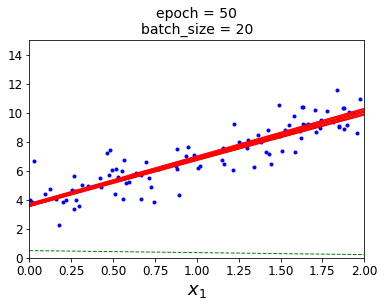

In [28]:
theta = np.random.randn(2, 1) # random initialization

minibatch_gradient_descent(theta, n_epochs=50, batch_size=20, theta_path=theta_path_mgd)

In [29]:
# check the optimum theta
theta_path_mgd[-1]

array([[ 3.77942977],
       [ 3.2733199 ]])

In [30]:
# convert the list of theta vectors of different theta vectors to numpy array
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

# check their shape
print(f"shape of theta_path_bgd is {theta_path_bgd.shape}")

shape of theta_path_bgd is (1500, 2, 1)


saving image... gradients_plot


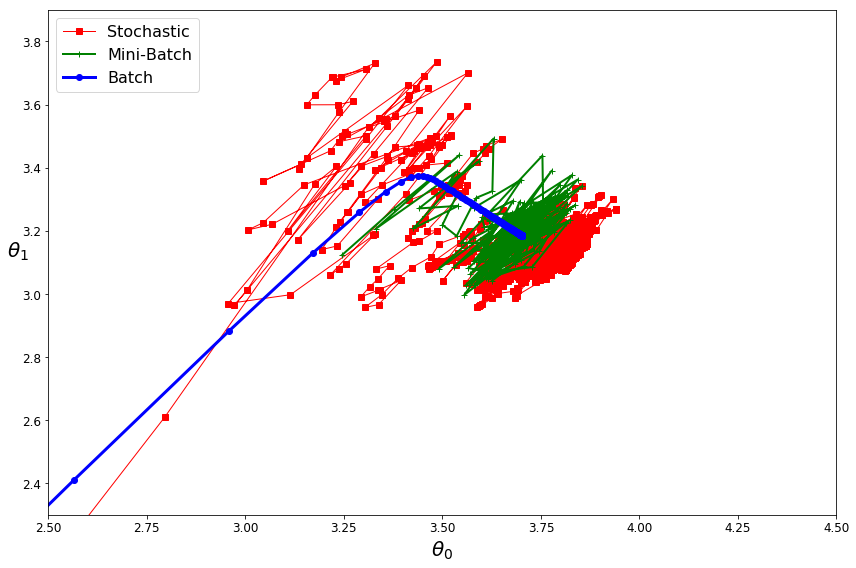

In [31]:
# plot the path of the convergence of the 3 gradient descent algorithms

# set the plot size
plt.figure(figsize=(12, 8))

# plot the paths of the 3 gradient descent algorithms
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-Batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")

# setting the plot options
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

# save the figure
save_fig("gradients_plot")

## Polynomial Regression

In [8]:
np.random.seed(42)

In [9]:
# generate some polynomial data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

saving image... quadratic_plot_noaxis


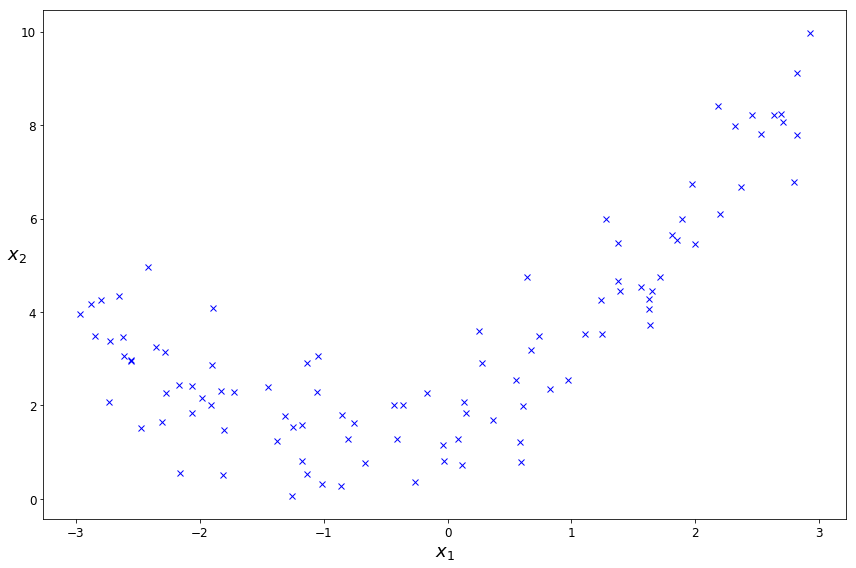

In [10]:
# plot the data
plt.figure(figsize=(12,8))
plt.plot(X, y, "bx")

# set plot options
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", rotation=0, fontsize=18)
#plt.axis([-3, 3, 0, 10])

# save the plot
save_fig("quadratic_plot_noaxis")

In [11]:
# add polynomial features to data
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [15]:
print("shape of X : ", X.shape)
print("="*25)
print("shape of X_poly :", X_poly.shape)

shape of X :  (100, 1)
shape of X_poly : (100, 2)


In [25]:
# perform linear regression using the sklearn library
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# print out the weights, ie. the theta corresponding to xi
print(f"theta_0 : {lin_reg.intercept_[0]}") # corresponding to x0
print(f"theta_1 : {lin_reg.coef_[0][0]}") # corresponding to x1
print(f"theta_2 : {lin_reg.coef_[0][1]}") # corresponding to x2

theta_0 : 1.7813458120291463
theta_1 : 0.9336689322536068
theta_2 : 0.564562633617075


saving image... poly_regression_plot


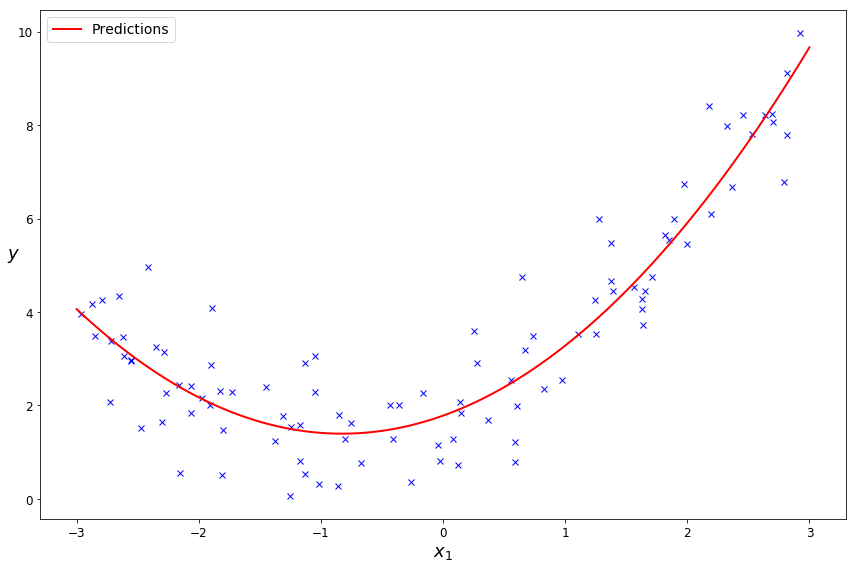

In [28]:
# generate new data points in the x range, ie. x1 values
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new) # add polynomial features to new dataset

# predict y using learned theta
y_new = lin_reg.predict(X_new_poly)

# plot the data; first plot original data, then fit the curve to generated data
plt.figure(figsize=(12,8))
plt.plot(X, y, "bx")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

# set the plot options
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

# save the plot
save_fig("poly_regression_plot")

saving image... multireg_plot


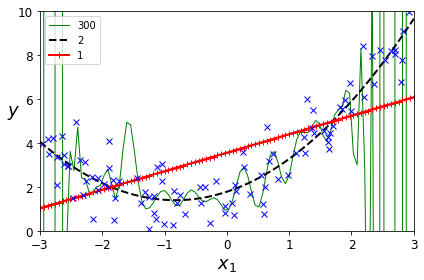

In [41]:
# scale the data and plot 3 different plots - univariate, bivariate, multi-variate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("k--", 2, 2), ("r-+", 2, 1)): #multi-variate, bivariate and univariate
    
    # create polynomial feature class, ie. all 3 variates
    poly_feature = PolynomialFeatures(degree=degree, include_bias=False)
    
    # perform standard scaling on the dataset
    std_scaler = StandardScaler()
    
    # create the linear regressor
    lin_reg = LinearRegression()
    
    # create a pipeline that adds polynomial features, performs standard scaling and fits linear regressor
    polynomial_regression = Pipeline([
        ("poly_features", poly_feature),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    
    # fit the polynomial regressor
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    
    # plot the fit for each degree on the same image to the X_new dataset
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
# plot the original datapoints
plt.plot(X, y, "bx", linewidth=3)

# set the plot options
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

# save the plot
save_fig("multireg_plot")

## Learning Curves

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# plot the learning curves
# a learning curve is a plot of some measure on the training set vs the validation
# with increasing number of instances ie. the value of m

def plot_learning_curve(model, X, y):
    
    # break the dataset into train set and validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    # lists to store train set errors and validation set errors
    train_error, val_error = [], []
    
    # for every iteration of m, fit m row instances to predict y values
    # calculate the error on train set and test set for the m row instances
    for m in range(1, len(X_train)):
        
        # fit the model
        model.fit(X_train[:m], y_train[:m])
        
        # predict y values
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        # append the errors to the respective lists
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))
        val_error.append(mean_squared_error(y_val, y_val_predict))
    
    # plot the training curves
    plt.figure(figsize=(12, 8))
    plt.plot(np.sqrt(train_error), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_error), "b-", linewidth=2, label="test")
    
    # set the plot options
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("train set size", fontsize=14)
    plt.ylabel("rmse", fontsize=14)

saving image... lc_underfit


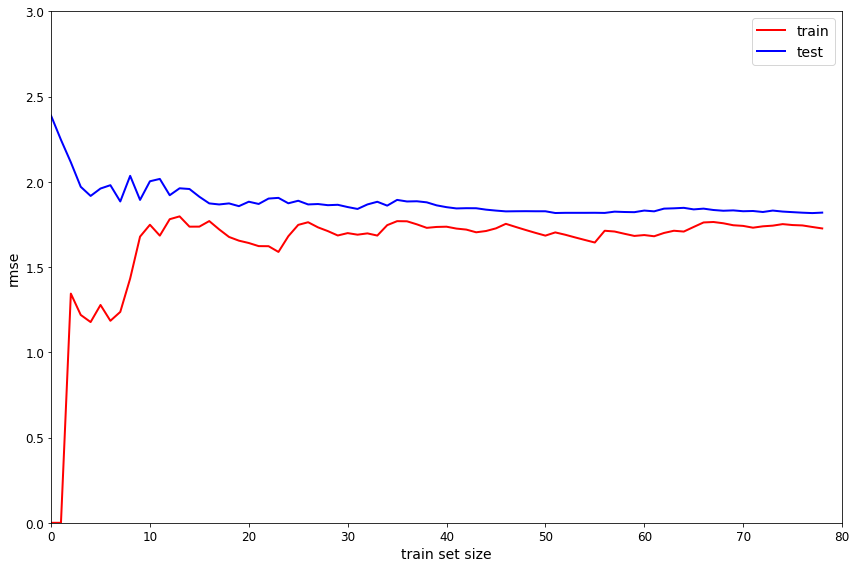

In [49]:
# create a linear regressor object and plot the learning curve
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
save_fig("lc_underfit")

saving image... lc_underfit_d10


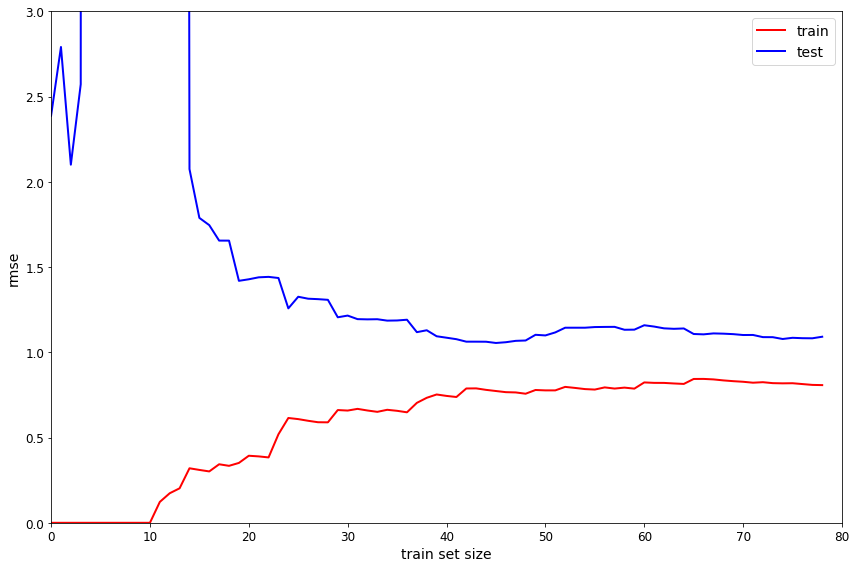

In [50]:
# create a pipeline of multivariate regression with degree 10 and fit linear regressor
# plot the learning curve of the corresponding regressor

from sklearn.pipeline import Pipeline

# create the pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

# plot the learning curve
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig("lc_underfit_d10")

saving image... lc_underfit_d2_scaled


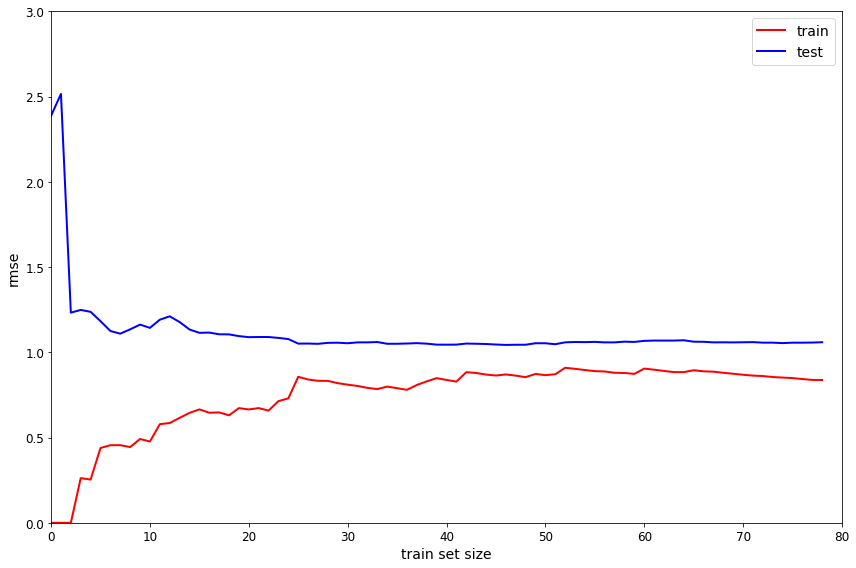

In [51]:
# create a pipeline of multivariate regression with degree 2 and fit linear regressor
# add a standard scaler also to the pipeline
# plot the learning curve of the corresponding regressor

from sklearn.pipeline import Pipeline

# create the pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression()),
])

# plot the learning curve
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig("lc_underfit_d2_scaled")

saving image... lc_underfit_d2_unscaled


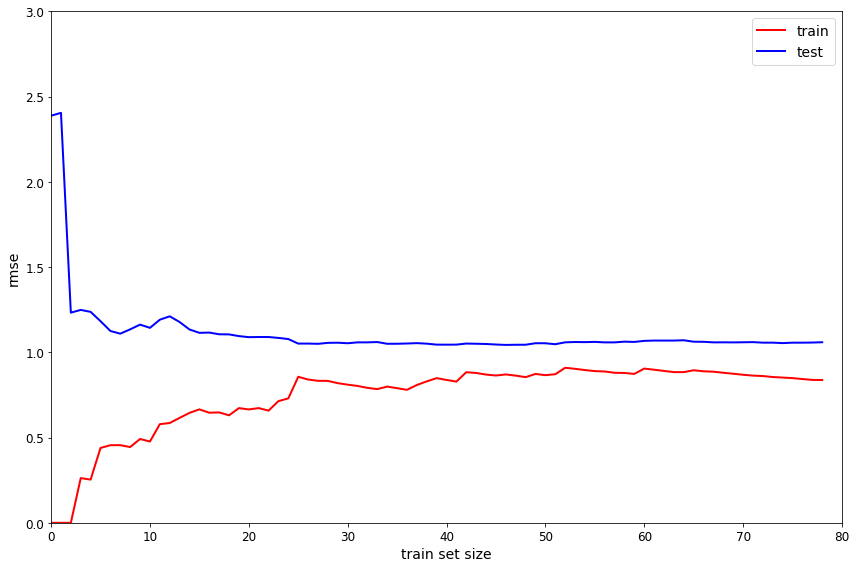

In [52]:
# create a pipeline of multivariate regression with degree 2 and fit linear regressor
# remove the standard scaler from the pipeline
# plot the learning curve of the corresponding regressor

from sklearn.pipeline import Pipeline

# create the pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

# plot the learning curve
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig("lc_underfit_d2_unscaled")

## Regularized Linear Models